In [1]:
%%capture
!pip install -q transformers datasets seqeval sentencepiece evaluate
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.6'

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' cre

In [ ]:
from datasets import load_dataset

dataset = load_dataset('GEOcite/DocumentSegmentationDataset', 'data', use_auth_token=True)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset docbank downloaded and prepared to /root/.cache/huggingface/datasets/MrPotato___docbank/data/1.0.0/79fdb6e1ac5d5b11d2489630f205d360158697a23283073be16b3c1dbf5d1d24. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
dataset['train'].features

{'id': Value(dtype='string', id=None),
 'words': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'bbox': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None),
 'original_image': Image(decode=True, id=None),
 'dataset': Value(dtype='string', id=None),
 'labels': Sequence(feature=ClassLabel(names=['abstract', 'author', 'caption', 'equation', 'figure', 'footer', 'paragraph', 'reference', 'section', 'table', 'title'], id=None), length=-1, id=None)}

In [ ]:
#labels = ['abstract', 'author', 'caption', 'date', 'equation', 'figure', 'footer', 'list', 'paragraph', 'reference', 'section', 'table', 'title']

In [ ]:
labels = ['abstract', 'author', 'caption', 'equation', 'figure', 'footer', 'paragraph', 'reference', 'section', 'table', 'title']

In [ ]:
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
#id2label[-100] = 'pad'
#label2id['pad'] = -100
print(id2label)

{0: 'abstract', 1: 'author', 2: 'caption', 3: 'equation', 4: 'figure', 5: 'footer', 6: 'paragraph', 7: 'reference', 8: 'section', 9: 'table', 10: 'title'}


In [ ]:
dataset['train']['dataset']

['geocite',
 'geocite',
 'geocite',
 'docbank',
 'geocite',
 'docbank',
 'geocite',
 'geocite',
 'geocite',
 'geocite',
 'docbank',
 'docbank',
 'docbank',
 'docbank',
 'docbank',
 'geocite',
 'geocite',
 'geocite',
 'geocite',
 'geocite',
 'geocite',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'geocite',
 'geocite',
 'docbank',
 'docbank',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'docbank',
 'docbank',
 'geocite',
 'geocite',
 'docbank',
 'geocite',
 'geocite',
 'docbank',
 'docbank',
 'docbank',
 'docbank',
 'docbank',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'geocite',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'docbank',
 'geocite',
 'docbank',
 'geocite',
 'docbank',
 'geocite',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'geocite',
 'docbank',
 'docbank',
 'docbank',
 'ge

In [ ]:
split = 'total'
dset = 'docbank'

l2count = {k: 0 for k in id2label.keys()}
if split == 'total':
    dset_labels = list(zip(dataset['train']['labels'], dataset['train']['dataset'])) + list(zip(dataset['test']['labels'], dataset['test']['dataset']))
else:
    dset_labels = zip(dataset[split]['labels'], dataset[split]['dataset'])
for p,d in dset_labels:
    if d == dset or dset == 'total':
        for l in p:
            l2count[l] = l2count[l] + 1
label2count = {id2label[k]: v for k,v in l2count.items()}
total_count = sum(label2count.values())
label2percent = {k: (v/total_count)*100 for k,v in label2count.items()}

In [ ]:
label2count

{'abstract': 63342,
 'author': 13454,
 'caption': 15075,
 'equation': 30274,
 'figure': 15378,
 'footer': 5359,
 'paragraph': 520831,
 'reference': 164125,
 'section': 4392,
 'table': 4657,
 'title': 3687}

In [ ]:
label2percent

{'abstract': 7.535564982975919,
 'author': 1.6005729418230876,
 'caption': 1.7934173552834134,
 'equation': 3.601586534915427,
 'figure': 1.8294641518771697,
 'footer': 0.6375405377753773,
 'paragraph': 61.96135022020667,
 'reference': 19.52534815495126,
 'section': 0.5225001011213766,
 'table': 0.5540261773502393,
 'title': 0.43862884172006267}

In [ ]:
from transformers import LayoutLMv2FeatureExtractor, LayoutXLMTokenizerFast

feature_extractor = LayoutLMv2FeatureExtractor(apply_ocr=False)
tokenizer = LayoutXLMTokenizerFast.from_pretrained("microsoft/layoutxlm-base")

In [ ]:
max_size = 512

In [ ]:
def tokenize_dataset(sample):
    chunks_id, chunks_input_ids, chunks_bbox, chunks_image, chunks_labels, chunks_attention_mask, chunks_dataset = [], [], [], [], [], [], []
    for idx in range(len(sample["words"])):
        processed = tokenizer(
            sample["words"][idx],
            boxes=sample["bbox"][idx],
            word_labels=sample["labels"][idx],
            max_length=max_size,
            padding="max_length",
            truncation=True,
            return_overflowing_tokens=True,
            return_offsets_mapping=True,
            return_attention_mask=True
        )

        for i, input_ids in enumerate(processed["input_ids"]):
            chunks_id.append(sample["id"][idx])
            chunks_dataset.append(sample["dataset"][idx])
            chunks_input_ids.append(input_ids)
            chunks_bbox.append(processed["bbox"][i])
            chunks_image.append(sample["original_image"][idx])
            chunks_labels.append(processed["labels"][i])
            chunks_attention_mask.append(processed["attention_mask"][i])
            #chunks_offsets_mapping.append(list(processed["offsets_mapping"][i]))
        #print(processed["labels"][i])
    return {
        "id": chunks_id,
        "input_ids": chunks_input_ids,
        "bbox": chunks_bbox,
        "image": chunks_image,
        "labels": chunks_labels,
        "attention_mask": chunks_attention_mask,
        "dataset": chunks_dataset,
        #"offsets_mapping": chunks_offsets_mapping
        }

In [ ]:
tokenized_dataset = dataset.map(tokenize_dataset, batched=True, remove_columns=dataset["train"].column_names)

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenized_dataset_geocite = tokenized_dataset.filter(lambda example: example["dataset"] == "geocite").shuffle(seed=42)
tokenized_dataset_docbank = tokenized_dataset.filter(lambda example: example["dataset"] == "docbank").shuffle(seed=42)

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
from datasets import concatenate_datasets
tokenized_dataset_all_train = concatenate_datasets([tokenized_dataset_docbank["train"], tokenized_dataset_geocite["train"]])
tokenized_dataset_all_test = concatenate_datasets([tokenized_dataset_docbank["test"], tokenized_dataset_geocite["test"]])

In [ ]:
from sklearn.preprocessing import minmax_scale

In [ ]:
label2count = {}
for sample in tokenized_dataset["train"]["labels"]:
    for i in sample:
        if i == -100:
            continue
        l = id2label[i]
        if l not in label2count:
            label2count[l] = 1
        else:
            label2count[l] += 1
count_all = sum(label2count.values())
weights = {}
for l, count in label2count.items():
    weights[l] = count_all/count
weights_sorted = [weights[l] for l in labels]
weights_scaled = minmax_scale(weights_sorted, feature_range=(.5, 1), axis=0, copy=True)

In [ ]:
weights

{'paragraph': 1.6099163824669929,
 'reference': 4.9128570131150076,
 'title': 162.62754704375905,
 'author': 104.17674750356633,
 'abstract': 15.611257188054468,
 'section': 167.6489898989899,
 'equation': 46.17927153155432,
 'footer': 34.95579541918962,
 'caption': 70.31378779125747,
 'table': 95.8560084006038,
 'figure': 68.41661982387109}

In [ ]:
weights_scaled

array([0.54216279, 0.80886354, 0.70689067, 0.63421345, 0.70117766,
       0.60041576, 0.5       , 0.50994628, 1.        , 0.78380697,
       0.98487873])

In [ ]:
len(tokenized_dataset_docbank["train"])

3770

In [ ]:
from transformers import PreTrainedTokenizerBase
from transformers.file_utils import PaddingStrategy
from torch.utils.data import DataLoader
from dataclasses import dataclass
import torch

from typing import Optional, Union

@dataclass
class DataCollatorForTokenClassification:
    """
    Data collator that will dynamically pad the inputs received, as well as the labels.

    Args:
        tokenizer (:class:`~transformers.PreTrainedTokenizer` or :class:`~transformers.PreTrainedTokenizerFast`):
            The tokenizer used for encoding the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.file_utils.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
        label_pad_token_id (:obj:`int`, `optional`, defaults to -100):
            The id to use when padding the labels (-100 will be automatically ignore by PyTorch loss functions).
    """

    feature_extractor: LayoutLMv2FeatureExtractor
    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    label_pad_token_id: int = -100

    def __call__(self, features):
        # prepare image input
        image = self.feature_extractor([feature["image"] for feature in features], apply_ocr=False,  do_resize=False, return_tensors="pt").pixel_values
        # prepare text input
        for feature in features:
            del feature["image"]
            del feature["id"]
            del feature["dataset"]
            #del feature["original_image"]
            #del feature["RGBs"]
            #del feature["fonts"]
            #del feature["bboxes"]

        # batch = self.tokenizer(
        #     feature["words"],
        #     boxes=feature["bbox"],
        #     word_labels=feature["labels"],
        #     pad_to_multiple_of=self.pad_to_multiple_of,

        # )
        batch = self.tokenizer.pad(
            features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt"
        )
        batch["image"] = image

        return batch

data_collator = DataCollatorForTokenClassification(
    feature_extractor,
    tokenizer,
    pad_to_multiple_of=None,
    padding="max_length",
    max_length=max_size,
)

train_dataset_all = tokenized_dataset_all_train
test_dataset_all = tokenized_dataset_all_test

train_dataset_geocite = tokenized_dataset_geocite['train']
test_dataset_geocite = tokenized_dataset_geocite['test']

train_dataset_docbank = tokenized_dataset_docbank['train']
test_dataset_docbank = tokenized_dataset_docbank['test']

In [ ]:
from torch.utils.data import DataLoader

shuffle = False

dataloader_train_all = DataLoader(train_dataset_all, batch_size=4, collate_fn=data_collator, shuffle=shuffle)
dataloader_test_all = DataLoader(test_dataset_all, batch_size=1, collate_fn=data_collator, shuffle=shuffle)

dataloader_train_geocite = DataLoader(train_dataset_geocite, batch_size=4, collate_fn=data_collator, shuffle=shuffle)
dataloader_test_geocite = DataLoader(test_dataset_geocite, batch_size=1, collate_fn=data_collator, shuffle=shuffle)

dataloader_train_docbank = DataLoader(train_dataset_docbank, batch_size=4, collate_fn=data_collator, shuffle=shuffle)
dataloader_test_docbank = DataLoader(test_dataset_docbank, batch_size=1, collate_fn=data_collator, shuffle=shuffle)

In [ ]:
batch = next(iter(dataloader_train_all))

for k,v in batch.items():
  print(k, v.shape)

You're using a LayoutXLMTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


bbox torch.Size([4, 514, 4])
labels torch.Size([4, 514])
input_ids torch.Size([4, 514])
attention_mask torch.Size([4, 514])
image torch.Size([4, 3, 224, 224])


In [ ]:
tokenizer.decode(batch['input_ids'][0])

'<s> ordered chain has an upper bound given by the union. So A A... Γ A 1 2 (cid:48) ∈ A (cid:48) i i the Lemma of Zorn provides us with a maximal element. That is a quasi-lattice Γ Γ follows from its maximality. Examples 3.15. Every Riemannian manifold of bounded geometry36 is a metric space M ⊂ of coarsely bounded geometry: any maximal set of points which are at least Γ M ≥ (cid:54) ∈ a fixed distance apart (i.e., there is an such that for all ) ε > 0 d(x, y) ε x = y Γ will do the job. We can get such a maximal set by invoking Zorn’s lemma. Note that a manifold of bounded geometry will also have locally bounded geometry, so no confusion can arise by not distinguishing between “coarsely” and “locally” bounded geometry in the terminology for manifolds. (cid:48) (cid:48) ∈ If is an arbitrary metric space that is bounded, i.e., for all (X, d) d(x, x ) < D x, x X and some, then any finite subset of will constitute a quasi-lattice. D X Let be a simplicial complex of bounded geometry37. Equ

In [ ]:
for id, label in zip(batch['input_ids'][0][:30], batch['labels'][0][:30]):
    print(id, label)
  #print(tokenizer.decode([id.item()]), -100 if label.item() == -100 else id2label[label.item()])

tensor(0) tensor(-100)
tensor(12989) tensor(6)
tensor(297) tensor(-100)
tensor(121293) tensor(6)
tensor(1556) tensor(6)
tensor(142) tensor(6)
tensor(1407) tensor(6)
tensor(56) tensor(-100)
tensor(6) tensor(6)
tensor(99091) tensor(6)
tensor(34475) tensor(6)
tensor(390) tensor(6)
tensor(70) tensor(6)
tensor(69941) tensor(6)
tensor(6) tensor(6)
tensor(5) tensor(6)
tensor(1061) tensor(6)
tensor(62) tensor(6)
tensor(62) tensor(6)
tensor(6) tensor(6)
tensor(5) tensor(6)
tensor(6) tensor(6)
tensor(5) tensor(6)
tensor(6) tensor(6)
tensor(5) tensor(6)
tensor(7806) tensor(6)
tensor(62) tensor(6)
tensor(106) tensor(6)
tensor(116) tensor(6)
tensor(15) tensor(6)


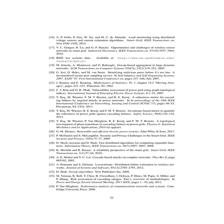

In [ ]:
import numpy as np
from PIL import Image

image_to_verify = batch['image'][0].numpy()
image_to_verify = np.moveaxis(image_to_verify, source=0, destination=-1)
image_to_verify = Image.fromarray(image_to_verify)
image_to_verify

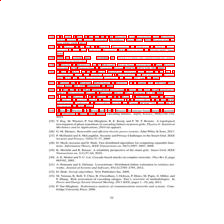

In [ ]:
from PIL import ImageDraw

def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

draw = ImageDraw.Draw(image_to_verify)
for bbox in batch['bbox'][0]:
    draw.rectangle(unnormalize_box(bbox, width=224, height=224), outline='red', width=1)

image_to_verify

In [ ]:
from transformers import LayoutLMv2ForTokenClassification

model = LayoutLMv2ForTokenClassification.from_pretrained('microsoft/layoutxlm-base',
                                                         id2label=id2label,
                                                         label2id=label2id)

Downloading:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/layoutxlm-base were not used when initializing LayoutLMv2ForTokenClassification: ['layoutlmv2.visual.backbone.bottom_up.res4.0.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.16.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.0.shortcut.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.6.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.0.shortcut.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.22.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.22.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res5.2.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.0.shortcut.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.2.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.11.conv1.norm.num_batches_tracked

In [ ]:
model.to(device)

LayoutLMv2ForTokenClassification(
  (layoutlmv2): LayoutLMv2Model(
    (embeddings): LayoutLMv2Embeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768)
      (x_position_embeddings): Embedding(1024, 128)
      (y_position_embeddings): Embedding(1024, 128)
      (h_position_embeddings): Embedding(1024, 128)
      (w_position_embeddings): Embedding(1024, 128)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (visual): LayoutLMv2VisualBackbone(
      (backbone): FPN(
        (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# config.update_from_string(f"max_position_embeddings={max_size}")

In [ ]:
# model = LayoutLMv2ForTokenClassification.from_pretrained('microsoft/layoutxlm-base',
#                                                          config=config,
#                                                          ignore_mismatched_sizes=True)

Some weights of the model checkpoint at microsoft/layoutxlm-base were not used when initializing LayoutLMv2ForTokenClassification: ['layoutlmv2.visual.backbone.bottom_up.res4.2.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.5.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.0.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.3.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.21.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.13.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res5.2.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.1.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.1.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.15.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.1.conv3.norm.num_batches_tracked', 'layout

In [ ]:
# from datasets import load_metric
# import numpy as np

# # Metrics
# metric = load_metric("f1")
# return_entity_level_metrics = True

In [ ]:
# from datasets import load_metric
# import numpy as np

# # Metrics
# metric = load_metric("f1")
# return_entity_level_metrics = False

# def compute_metrics(p):
#     predictions, labels = p
#     predictions = np.argmax(predictions, axis=2)

#     # Remove ignored index (special tokens)
#     true_predictions = [
#         [p for (p, l) in zip(prediction, label) if l != -100]
#         for prediction, label in zip(predictions, labels)
#     ]
#     true_labels = [
#         [l for (p, l) in zip(prediction, label) if l != -100]
#         for prediction, label in zip(predictions, labels)
#     ]

#     print(true_predictions)
#     print(true_labels)
#     results = metric.compute(predictions=true_predictions, references=true_labels)
#     if return_entity_level_metrics:
#         # Unpack nested dictionaries
#         final_results = {}
#         for key, value in results.items():
#             if isinstance(value, dict):
#                 for n, v in value.items():
#                     final_results[f"{key}_{n}"] = v
#             else:
#                 final_results[key] = value
#         return final_results
#     else:
#         return {
#             "precision": results["overall_precision"],
#             "recall": results["overall_recall"],
#             "f1": results["overall_f1"],
#             "accuracy": results["overall_accuracy"],
#         }

In [ ]:
epochs = 2
batch_size = 4
lr = 5e-5

In [ ]:
from torch import nn
from transformers import Trainer


class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor(weights_scaled, dtype=torch.float32).to(device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [ ]:
from transformers import TrainingArguments

args = TrainingArguments(
    output_dir="layout-xlm-geocite-v2",
    overwrite_output_dir=True,
    num_train_epochs=epochs,
    #max_steps=1000,
    warmup_ratio=0.1,
    # fp16=True, # mixed precision
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=1,
    learning_rate=lr,
    save_steps=2000,
    remove_unused_columns=False,
    push_to_hub=True, # we'd like to push our model to the hub during training
)

# Initialize our Trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset_all,
    #eval_dataset=test_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    #compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.8/dist-packages/huggingface_hub/repository.py:725: FutureWarning: Creating a repository through 'clone_from' is deprecated and will be removed in v0.12. Please create the repository first using `create_repo(..., exists_ok=True)`.
  warnings.warn(
Cloning https://huggingface.co/MrPotato/layout-xlm-geocite-v2 into local empty directory.


In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 6864
  Num Epochs = 2
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 3432
  Number of trainable parameters = 368234763




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=3432, training_loss=0.28435019401959327, metrics={'train_runtime': 2893.5349, 'train_samples_per_second': 4.744, 'train_steps_per_second': 1.186, 'total_flos': 7440270592689792.0, 'train_loss': 0.28435019401959327, 'epoch': 2.0})

In [ ]:
from transformers import LayoutLMv2ForTokenClassification

model = LayoutLMv2ForTokenClassification.from_pretrained('MrPotato/layout-xlm-geocite_v2',
                                                         id2label=id2label,
                                                         label2id=label2id)

Downloading:   0%|          | 0.00/3.40k [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--MrPotato--layout-xlm-geocite_v2/snapshots/3eaa29795c6a503a3d4379c2e9d0c70d9fc17663/config.json
Model config LayoutLMv2Config {
  "_name_or_path": "microsoft/layoutxlm-base",
  "architectures": [
    "LayoutLMv2ForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "convert_sync_batchnorm": true,
  "coordinate_size": 128,
  "detectron2_config_args": {
    "MODEL.ANCHOR_GENERATOR.SIZES": [
      [
        32
      ],
      [
        64
      ],
      [
        128
      ],
      [
        256
      ],
      [
        512
      ]
    ],
    "MODEL.BACKBONE.NAME": "build_resnet_fpn_backbone",
    "MODEL.FPN.IN_FEATURES": [
      "res2",
      "res3",
      "res4",
      "res5"
    ],
    "MODEL.MASK_ON": true,
    "MODEL.PIXEL_STD": [
      57.375,
      57.12,
      58.395
    ],
    "MODEL.POST_NMS_TOPK_TEST": 1000,
    "MODEL.RESNETS.ASPECT_RATIOS": [
      [
   

Downloading:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--MrPotato--layout-xlm-geocite_v2/snapshots/3eaa29795c6a503a3d4379c2e9d0c70d9fc17663/pytorch_model.bin


RuntimeError: ignored

In [ ]:
model.to(device)

LayoutLMv2ForTokenClassification(
  (layoutlmv2): LayoutLMv2Model(
    (embeddings): LayoutLMv2Embeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768)
      (x_position_embeddings): Embedding(1024, 128)
      (y_position_embeddings): Embedding(1024, 128)
      (h_position_embeddings): Embedding(1024, 128)
      (w_position_embeddings): Embedding(1024, 128)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (visual): LayoutLMv2VisualBackbone(
      (backbone): FPN(
        (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import evaluate
import zipfile
from tqdm.auto import tqdm
from glob import glob

In [ ]:
dataset2pred = {}

loader_list = {
    "all": dataloader_test_all,
    "geocite": dataloader_test_geocite,
    "docbank": dataloader_test_docbank,
}

model.eval()
for key, value in loader_list.items():
    y_preds = []
    y_trues = []
    metric = evaluate.load('f1')
    for batch in tqdm(value):
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1).cpu().detach().numpy()
        labels_batch = batch["labels"].cpu().detach().numpy()
        true_predictions = [
            [p for (p, l) in zip(prediction, label) if l != -100]
            for prediction, label in zip(predictions, labels_batch)
        ]
        true_labels = [
            [l for (p, l) in zip(prediction, label) if l != -100]
            for prediction, label in zip(predictions, labels_batch)
        ]
        y_preds.append(true_predictions[0])
        y_trues.append(true_labels[0])
        metric.add_batch(predictions=true_predictions[0], references=true_labels[0])

    dataset2pred[key] = (y_preds, y_trues)
    print(f"F1 score {key} :{metric.compute(average='micro')['f1']}")

  0%|          | 0/722 [00:00<?, ?it/s]

F1 score all :0.9578631831377004


  0%|          | 0/311 [00:00<?, ?it/s]

F1 score geocite :0.9441089159586447


  0%|          | 0/411 [00:00<?, ?it/s]

F1 score docbank :0.9683048947012001


In [ ]:
base_filename = f"fig_docseg_shuffle={shuffle}_lr={lr}_epochs={epochs}_batchs={batch_size}_all_notweighted_"

Plotting evaluation for 'all'.


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

Plotting evaluation for 'geocite'.
Plotting evaluation for 'docbank'.


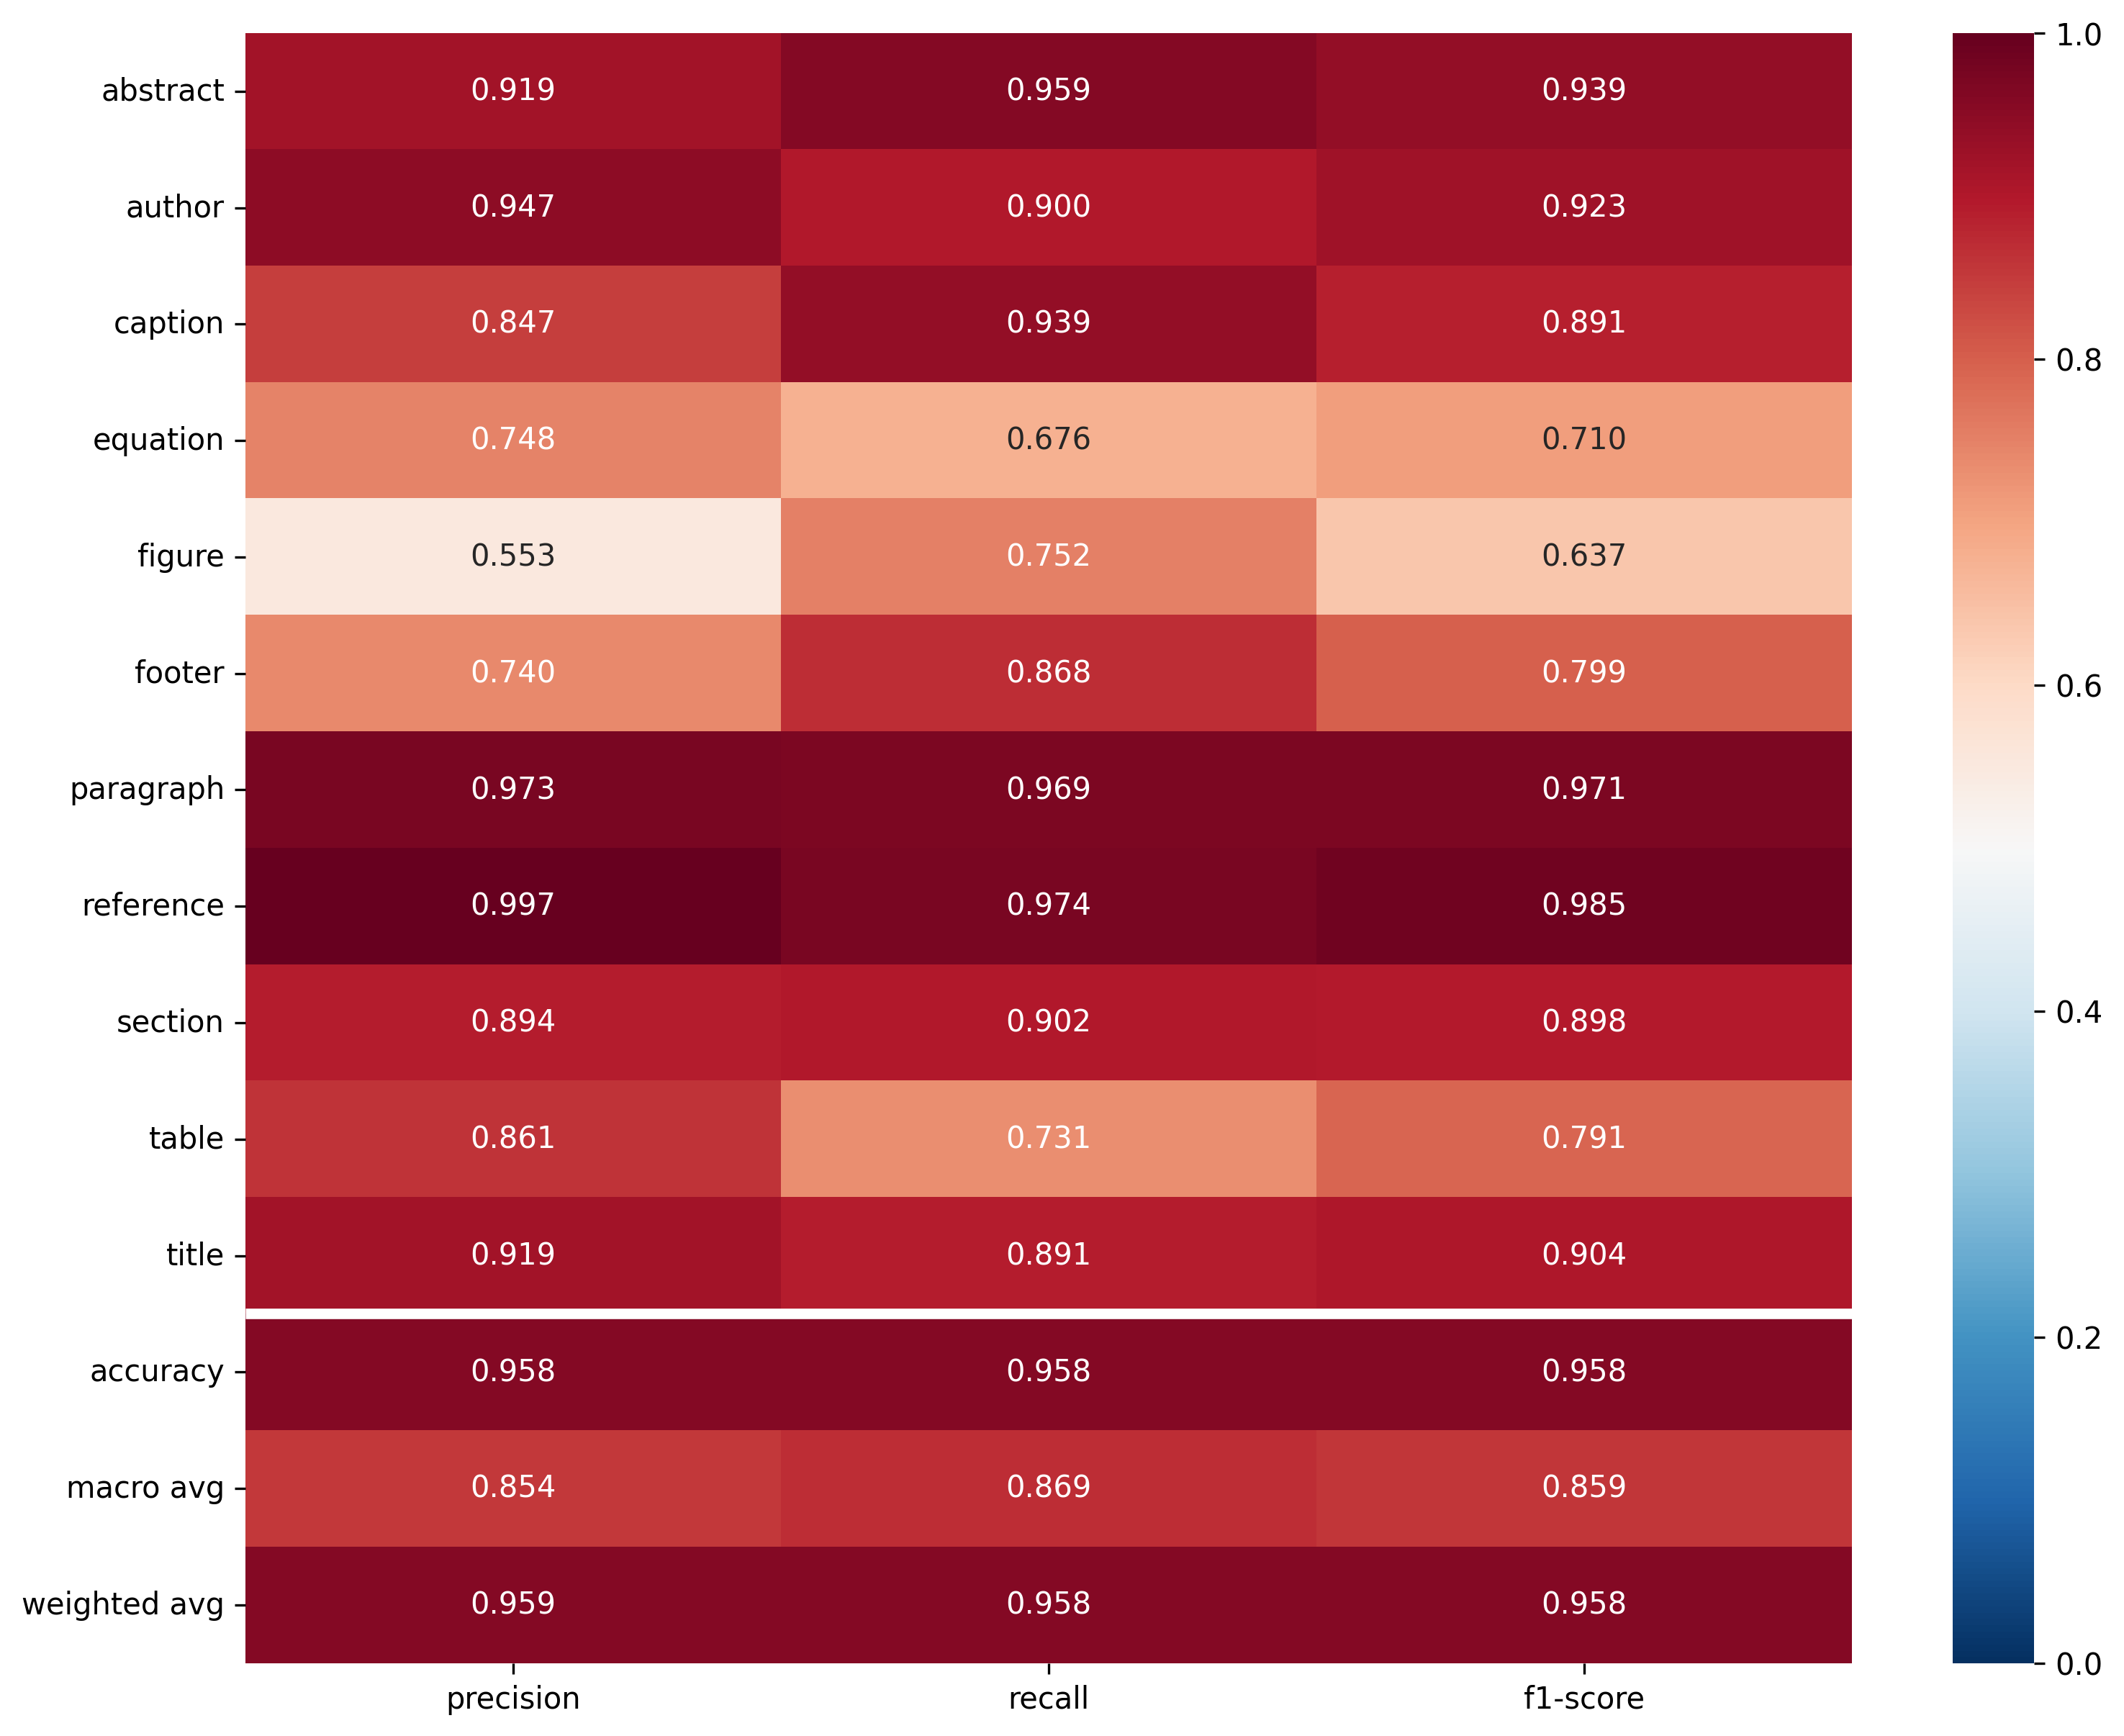

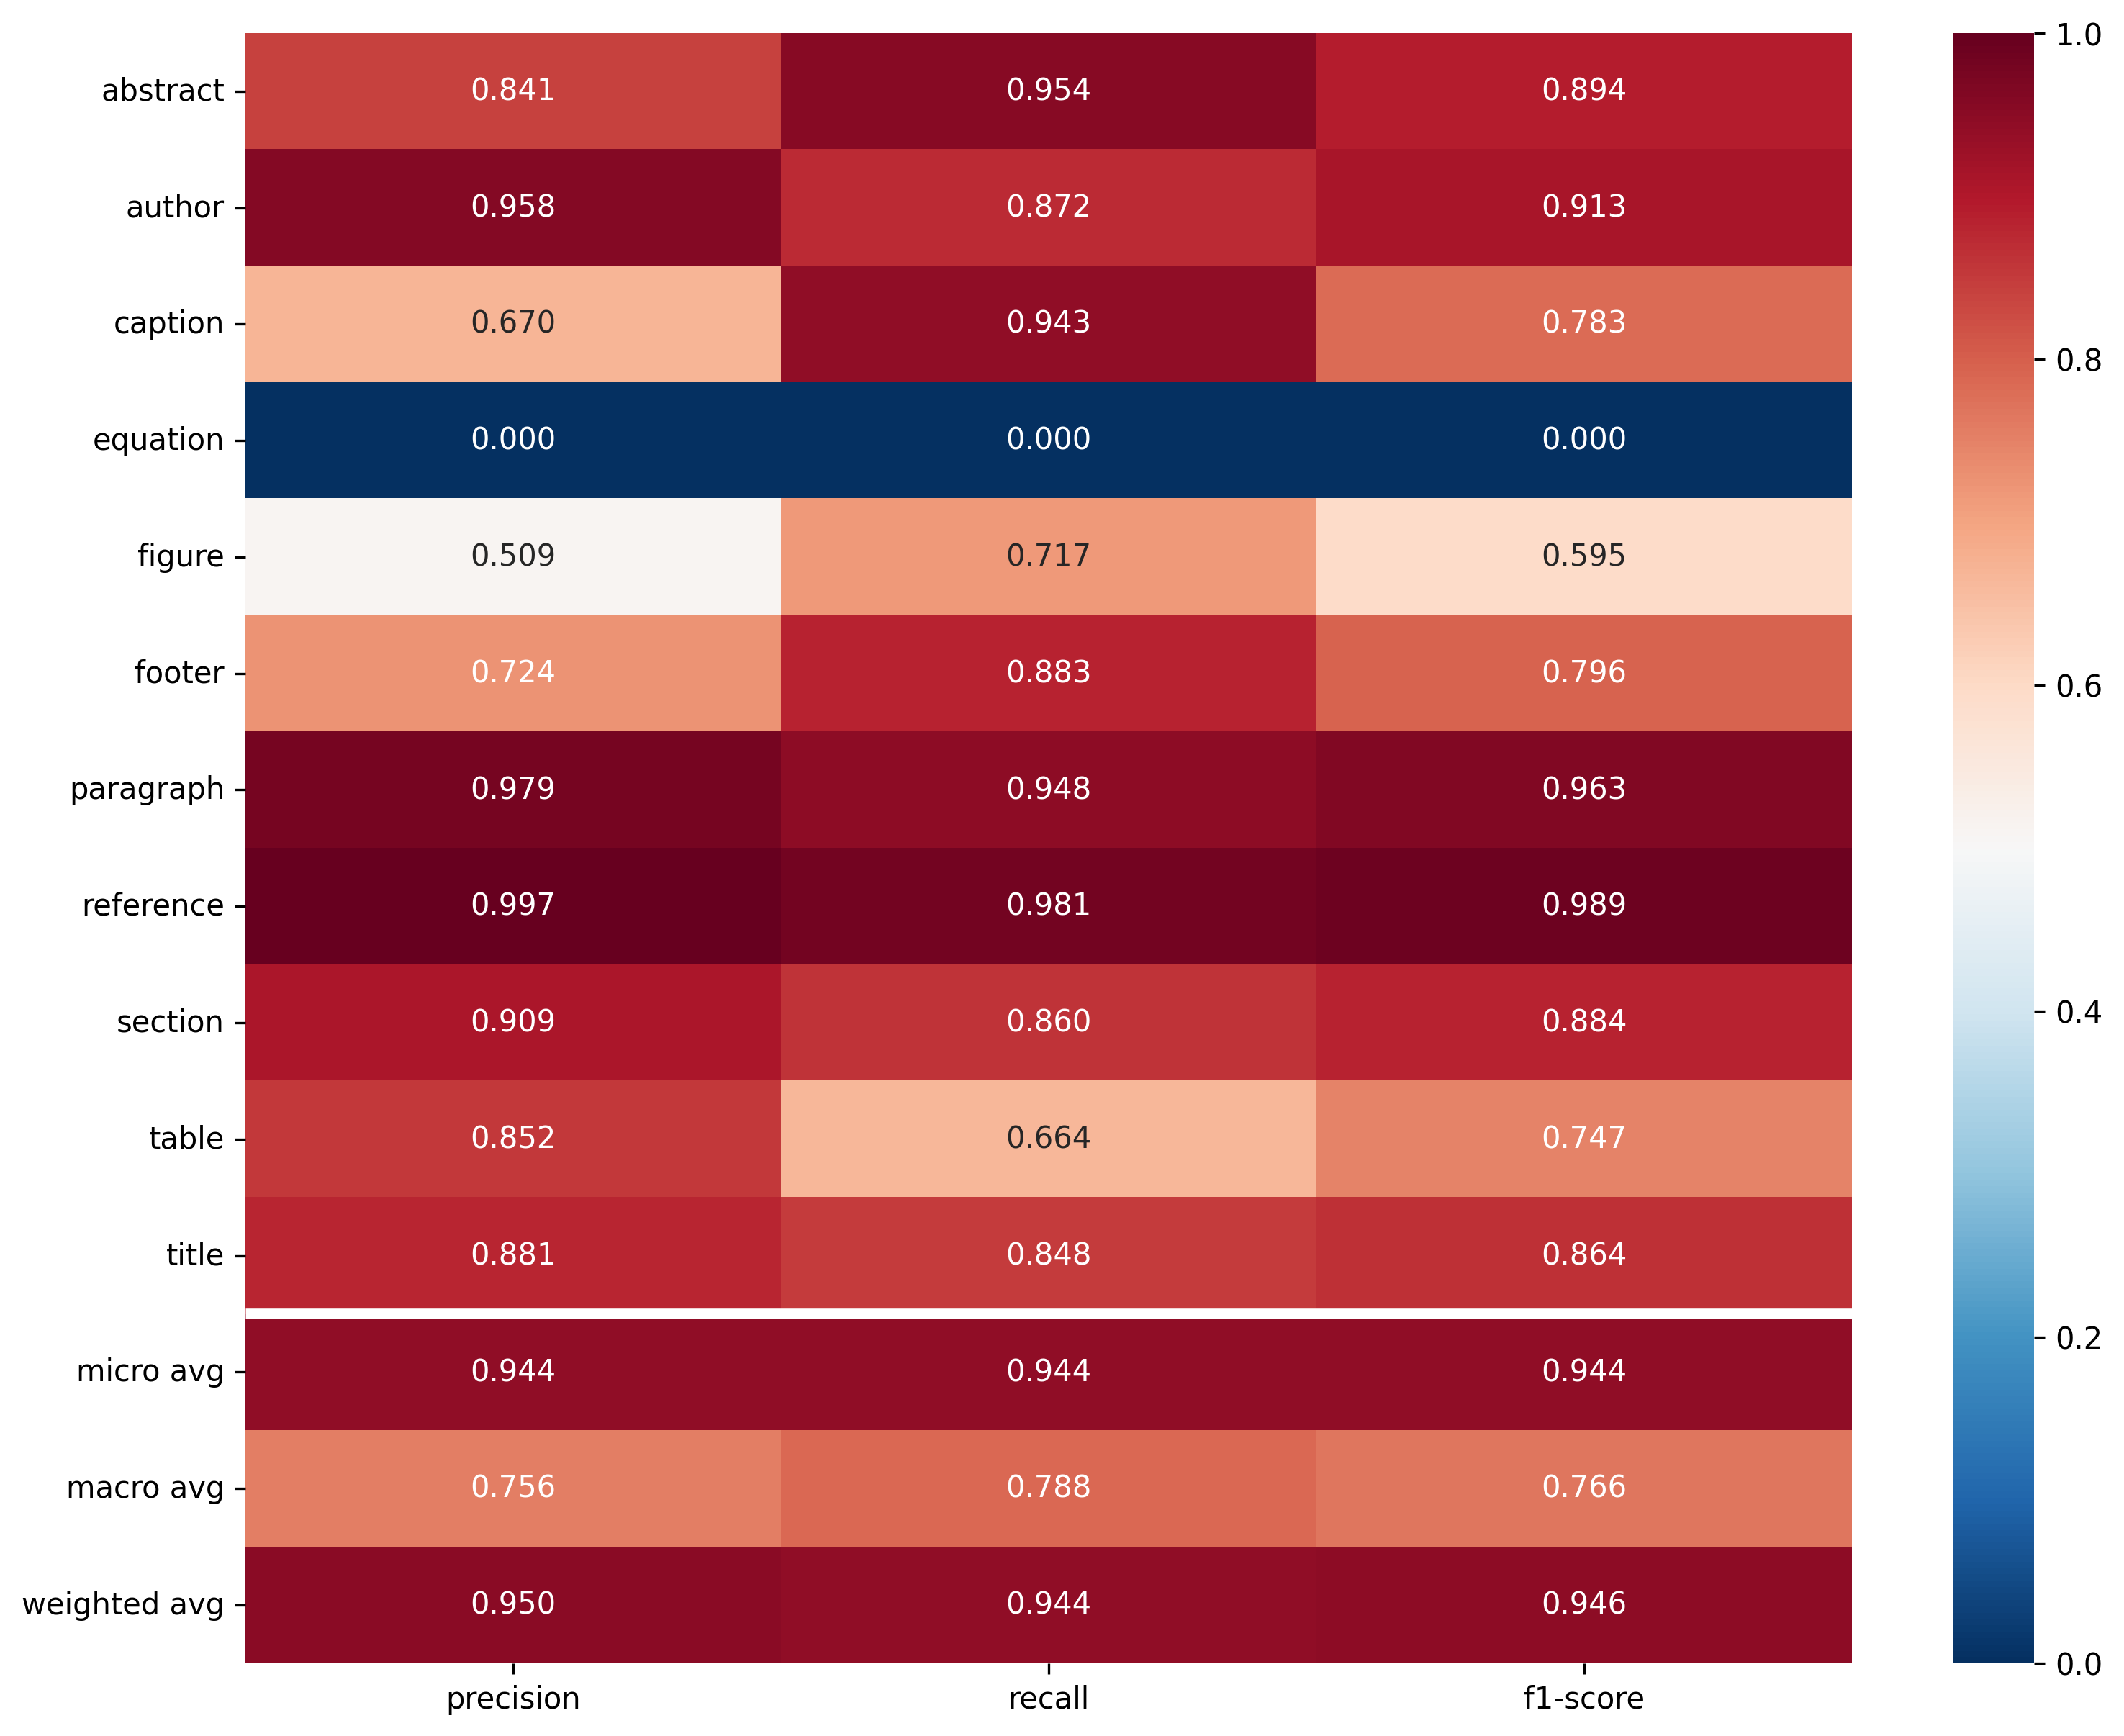

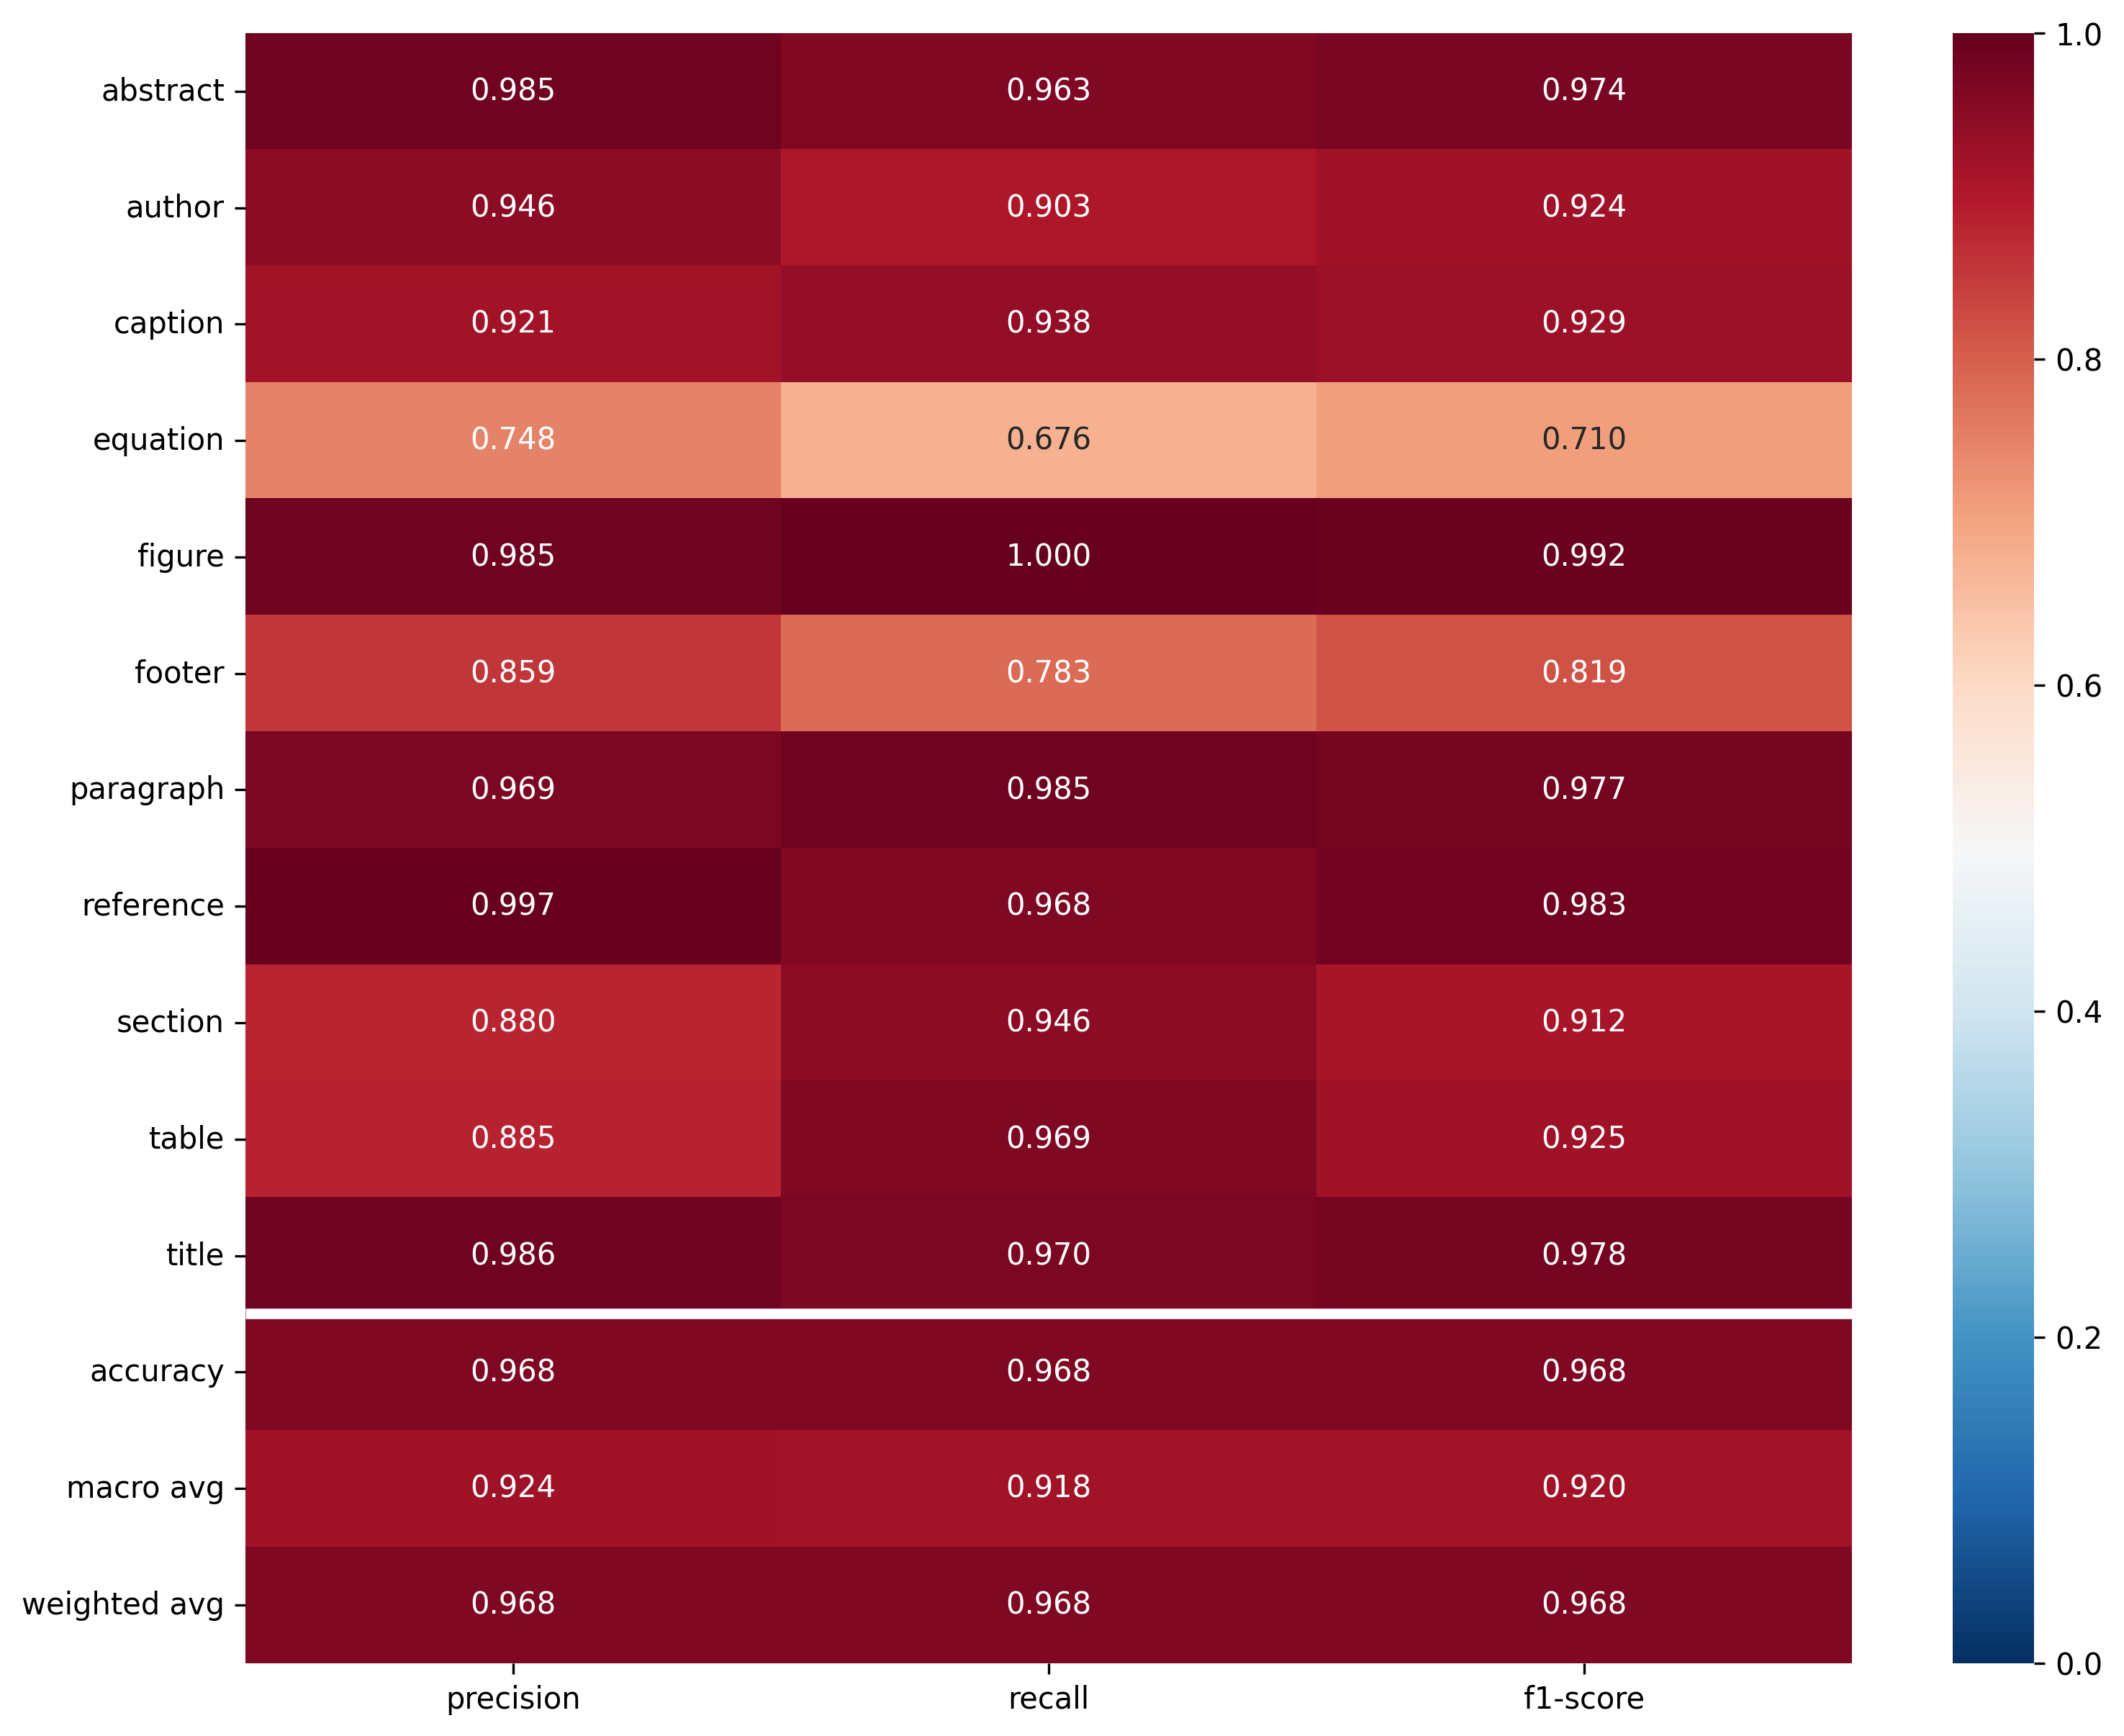

In [ ]:
for key, (y_trues, y_preds) in dataset2pred.items():
    y_trues_label = [id2label[y] for row in y_trues for y in row]
    y_preds_label = [id2label[y] for row in y_preds for y in row]

    report = classification_report(y_trues_label, y_preds_label, labels=labels, output_dict=True)
    df_cr = pd.DataFrame(report)
    fig, ax = plt.subplots(figsize=(12,10), dpi=300)
    sns.heatmap(df_cr.iloc[:-1, :].T, annot=True, fmt=".3f", cmap= 'RdBu_r', vmin=0, vmax=1, ax=ax )
    ax.hlines([len(labels)], *ax.get_xlim(), colors="white", linewidths = 3.5)
    print(f"Plotting evaluation for '{key}'.")
    fig.show()
    fig.savefig(base_filename + "cls_report_" + key + ".png")

In [ ]:
for key, (y_trues, y_preds) in dataset2pred.items():
    y_trues_label = [id2label[y] for row in y_trues for y in row]
    y_preds_label = [id2label[y] for row in y_preds for y in row]

    for norm in ["true", "pred"]:
        confusion_matrix = metrics.confusion_matrix(y_trues_label, y_preds_label, normalize=norm, labels=labels)
        df_cm = pd.DataFrame(confusion_matrix, index = labels,
                        columns = labels)
        #plt.figure(figsize = (10,10))
        fig, ax = plt.subplots(figsize=(12,10), dpi=300)
        s = sns.heatmap(df_cm, annot=True, fmt=".3f", cmap= 'RdBu_r', ax=ax, vmin=0, vmax=1)
        s.set(xlabel='Predicted labels', ylabel='True labels')
        plt.yticks(rotation=0)
        plt.xticks(rotation=30)
        fig.show()
        fig.savefig(base_filename + f"conf_matrix_norm_{norm}_" + key + ".png")

In [ ]:
print('Compressing image files...')
path_csv_files = glob('*.png')
with zipfile.ZipFile(base_filename + '11_1_23.zip', 'w') as zipMe:
    for file in tqdm(path_csv_files):
        zipMe.write(file, compress_type=zipfile.ZIP_DEFLATED)
!find . -name "*.png" -type f -delete

Compressing image files...


  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
trainer.push_to_hub()

Saving model checkpoint to layout-xlm-geocite-v2
Configuration saved in layout-xlm-geocite-v2/config.json
Model weights saved in layout-xlm-geocite-v2/pytorch_model.bin
tokenizer config file saved in layout-xlm-geocite-v2/tokenizer_config.json
Special tokens file saved in layout-xlm-geocite-v2/special_tokens_map.json
Adding files tracked by Git LFS: ['tokenizer.json']. This may take a bit of time if the files are large.


Upload file pytorch_model.bin:   0%|          | 3.30k/1.38G [00:00<?, ?B/s]

Upload file training_args.bin: 100%|#########9| 3.30k/3.31k [00:00<?, ?B/s]

Upload file tokenizer.json:   0%|          | 3.30k/16.3M [00:00<?, ?B/s]

Upload file sentencepiece.bpe.model:   0%|          | 3.30k/4.83M [00:00<?, ?B/s]

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/MrPotato/layout-xlm-geocite-v2
   23ccfa8..5bc7344  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/MrPotato/layout-xlm-geocite-v2
   23ccfa8..5bc7344  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Token Classification', 'type': 'token-classification'}}
To https://huggingface.co/MrPotato/layout-xlm-geocite-v2
   5bc7344..a3c9a50  main -> main

   5bc7344..a3c9a50  main -> main



'https://huggingface.co/MrPotato/layout-xlm-geocite-v2/commit/5bc73442cfa797e7c1f029432a67ed64b8c23dfd'

# Legacy Code

In [ ]:
import numpy as np
def transform_func(examples):
    keys = examples.keys()
    if "input_ids" in keys:
        examples["input_ids"] = [torch.tensor(x) for x in examples["input_ids"]]
    if "bbox" in keys:
        examples["bbox"] = [torch.tensor(x) for x in examples["bbox"]]
    if "labels" in keys:
        examples["labels"] = [torch.tensor(x) for x in examples["labels"]]
    if "attention_mask" in keys:
        examples["attention_mask"] = [torch.tensor(x) for x in examples["attention_mask"]]
    if "image" in keys:
        examples["image"] = [np.array(img) for img in examples["image"]]
    return examples
tokenized_dataset_ex = tokenized_dataset.with_transform(transform_func)
#tokenized_dataset_ex["train"]["image"][0]

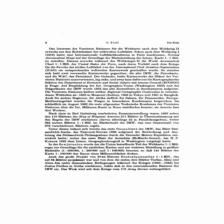

In [ ]:
example = dataset['test'][70]
test_image = example['original_image']
# make image a bit smaller for visualization
width, height = test_image.size
test_image.resize((int(width), int(height)))

In [ ]:
from transformers import LayoutLMv2FeatureExtractor

feature_extractor = LayoutLMv2FeatureExtractor(apply_ocr=True, ocr_lang='deu')

In [ ]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [ ]:
inputs = feature_extractor(test_image, return_tensors="pt")
print(inputs.keys())

dict_keys(['pixel_values', 'words', 'boxes'])


In [ ]:
example

{'id': '69_1',
 'input_ids': [4,
  313,
  5,
  627,
  5,
  74,
  151466,
  4,
  276,
  5,
  10,
  5,
  56530,
  44609,
  7,
  4,
  313,
  5,
  335,
  5,
  15,
  69489,
  7,
  5,
  2077,
  24955,
  65786,
  111,
  70,
  23924,
  24453,
  195075,
  7,
  5,
  238040,
  4,
  11716,
  9,
  16360,
  5,
  601,
  167177,
  18544,
  4,
  627,
  5,
  866,
  5,
  5173,
  82036,
  12,
  62723,
  92949,
  214,
  136,
  20022,
  1830,
  71579,
  7,
  23,
  70,
  930,
  538,
  32547,
  12506,
  73,
  4,
  182688,
  148503,
  31667,
  5,
  360,
  12,
  34419,
  111,
  70,
  2206,
  109622,
  67081,
  111,
  28173,
  209,
  4,
  90483,
  9,
  154019,
  5,
  44389,
  4,
  627,
  5,
  601,
  5,
  215045,
  12,
  602,
  6660,
  67,
  113068,
  23,
  8394,
  48850,
  5489,
  1517,
  9,
  42967,
  5,
  360,
  12,
  218107,
  643,
  30152,
  178851,
  18709,
  30777,
  952,
  126884,
  5,
  2583,
  19,
  724,
  4,
  627,
  5,
  601,
  5,
  10,
  5,
  19909,
  8331,
  223,
  22884,
  4,
  87,
  5,
  202727,
 

In [ ]:
from transformers import LayoutXLMTokenizerFast

tokenizer = LayoutXLMTokenizerFast.from_pretrained("microsoft/layoutxlm-base")

loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--microsoft--layoutxlm-base/snapshots/8e04ebc4d3ba0013cf943b697c0aedf19b06472a/sentencepiece.bpe.model
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--microsoft--layoutxlm-base/snapshots/8e04ebc4d3ba0013cf943b697c0aedf19b06472a/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--microsoft--layoutxlm-base/snapshots/8e04ebc4d3ba0013cf943b697c0aedf19b06472a/config.json
loading configuration file config.4.13.0.json from cache at /root/.cache/huggingface/hub/models--microsoft--layoutxlm-base/snapshots/8e04ebc4d3ba0013cf943b697c0aedf19b06472a/config.4.13.0.json
Model config LayoutLMv2Config {
  "_name_or_path": "microsoft/layoutxlm-base",
  "attention_probs_dropout_pr

In [ ]:
# we specify `return_offsets_mapping=True` here as we'll use the offsets later on
# in order to know which tokens are at the start of a word and which aren't
encoding = tokenizer(inputs.words, boxes=inputs.boxes, return_offsets_mapping=True,
                     padding="max_length", max_length=512, truncation=True, return_tensors="pt")
for k,v in encoding.items():
  print(k,v.shape)

input_ids torch.Size([1, 512])
attention_mask torch.Size([1, 512])
offset_mapping torch.Size([1, 512, 2])
bbox torch.Size([1, 512, 4])


In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)

with torch.no_grad():
  outputs = model(input_ids=encoding.input_ids.to(device),
                  attention_mask=encoding.attention_mask.to(device),
                  bbox=encoding.bbox.to(device),
                  image=inputs.pixel_values.to(device),
  )

In [ ]:
with torch.no_grad():
  outputs = model(input_ids=example['input_ids'],
                  attention_mask=example['attention_mask'],
                  bbox=example['bbox'],
                  image=example['original_image'],
  )

KeyError: ignored

In [ ]:
def unnormalize_box(bbox, width, height):
     return [
         width * (bbox[0] / 1000),
         height * (bbox[1] / 1000),
         width * (bbox[2] / 1000),
         height * (bbox[3] / 1000),
     ]

In [ ]:
predictions = outputs.logits.argmax(-1).squeeze().tolist()
token_boxes = encoding.bbox.squeeze().tolist()

width, height = test_image.size

In [ ]:
import numpy as np

is_subword = np.array(encoding.offset_mapping.squeeze().tolist())[:,0] != 0

true_predictions = [model.config.id2label[pred] for idx, pred in enumerate(predictions) if not is_subword[idx]]
true_boxes = [unnormalize_box(box, width, height) for idx, box in enumerate(token_boxes) if not is_subword[idx]]

In [ ]:
label2color = {'paragraph':'blue', 'reference':'green', 'abstract':'orange', 'author':'red', 'title': 'cyan', 'abstract': 'violet', 'caption': 'yellow', 'section': 'grey'}

[0.0, 0.0, 0.0, 0.0]
[224.0, 224.0, 224.0, 224.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0,

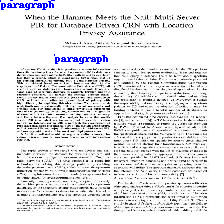

In [ ]:
from PIL import ImageDraw, ImageFont

draw = ImageDraw.Draw(test_image)

font = ImageFont.load_default()

def iob_to_label(label):
    if not label:
      return 'other'
    return label



for prediction, box in zip(true_predictions, true_boxes):
    print(box)
    predicted_label = iob_to_label(prediction).lower()
    draw.rectangle(unnormalize_box(box, 244, 244), outline=label2color[predicted_label])
    draw.text((unnormalize_box(box, 244, 244)[0]+1, unnormalize_box(box, 244, 244)[1]-1), text=predicted_label, fill=label2color[predicted_label], font=font)

test_image

In [ ]:
example = dataset['validation'][402]
further_image = example['original_image']
inputs = feature_extractor(further_image, return_tensors="pt")
encoding = tokenizer(inputs.words, boxes=inputs.boxes, return_offsets_mapping=True,
                     padding="max_length", max_length=512, truncation=True, return_tensors="pt")
model.to(device)

with torch.no_grad():
  outputs = model(input_ids=encoding.input_ids.to(device),
                  attention_mask=encoding.attention_mask.to(device),
                  bbox=encoding.bbox.to(device),
                  image=inputs.pixel_values.to(device),
  )
predictions = outputs.logits.argmax(-1).squeeze().tolist()
token_boxes = encoding.bbox.squeeze().tolist()

width, height = further_image.size
is_subword = np.array(encoding.offset_mapping.squeeze().tolist())[:,0] != 0

true_predictions = [model.config.id2label[pred] for idx, pred in enumerate(predictions) if not is_subword[idx]]
true_boxes = [unnormalize_box(box, width, height) for idx, box in enumerate(token_boxes) if not is_subword[idx]]
draw = ImageDraw.Draw(further_image)

font = ImageFont.load_default()

#label2color = {'paragraph':'blue', 'reference':'green', 'abstract':'orange', 'author':'red', 'title': 'cyan', 'abstract': 'violet'}

for prediction, box in zip(true_predictions, true_boxes):
    predicted_label = iob_to_label(prediction).lower()
    draw.rectangle(box, outline=label2color[predicted_label])
    draw.text((box[0]+10, box[1]-10), text=predicted_label, fill=label2color[predicted_label], font=font)

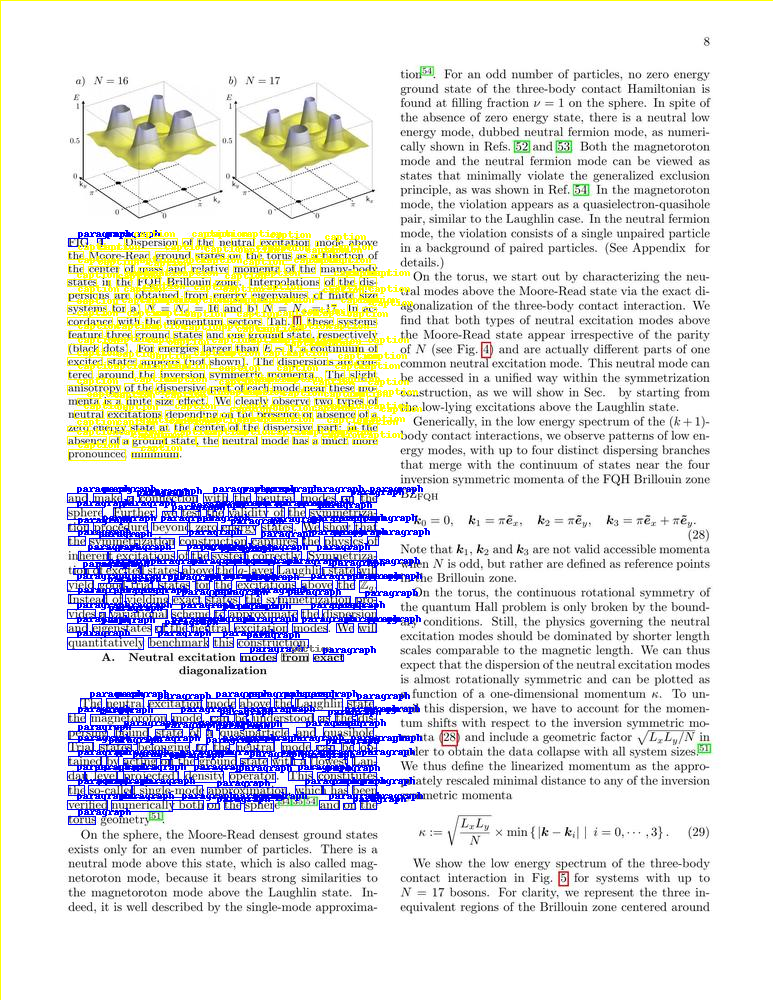

In [ ]:
further_image

In [ ]:
from transformers import LayoutXLMProcessor

processor = LayoutXLMProcessor(feature_extractor, tokenizer)

In [ ]:
processor.push_to_hub("MrPotato/layoutxlm-finetuned-docbank")

CommitInfo(commit_url='https://huggingface.co/MrPotato/layoutxlm-finetuned-docbank/commit/f3ea2019864babe85a467388115fc25daa2e2108', commit_message='Upload processor', commit_description='', oid='f3ea2019864babe85a467388115fc25daa2e2108', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
path_sample = 'http://hyperion.bbirke.de/data/sample/disP_1977_00041024_1.jpg'
from PIL import Image
import requests
from io import BytesIO

response = requests.get(path_sample)
img = Image.open(BytesIO(response.content))

In [ ]:
def iob_to_label(label):
    if not label:
      return 'other'
    return label

In [ ]:
processed = processor(img, return_tensors="pt")

In [ ]:
for k,v in processed.items():
  print(k,v.shape)

input_ids torch.Size([1, 1431])
attention_mask torch.Size([1, 1431])
bbox torch.Size([1, 1431, 4])
image torch.Size([1, 3, 224, 224])


In [ ]:
processed_chunks = {}
for k,v in processed.items():
    if k != 'image':
        processed_chunks[k] = torch.split(v, split_size_or_sections=512, dim=1)


In [ ]:
processed_chunks['input_ids'][0].shape

torch.Size([1, 512])

In [ ]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)

output_list = []
for i in range(len(processed_chunks['input_ids'])):
    with torch.no_grad():
        outputs = model(input_ids=processed_chunks['input_ids'][0].to(device),
                        attention_mask=processed_chunks['attention_mask'][0].to(device),
                        bbox=processed_chunks['bbox'][0].to(device),
                        image=processed['image'].to(device),)
        output_list.append(outputs)

In [ ]:
labels = ['abstract', 'author', 'caption', 'date', 'equation', 'figure', 'footer', 'list', 'paragraph', 'reference', 'section', 'table', 'title']
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
print(id2label)

{0: 'abstract', 1: 'author', 2: 'caption', 3: 'date', 4: 'equation', 5: 'figure', 6: 'footer', 7: 'list', 8: 'paragraph', 9: 'reference', 10: 'section', 11: 'table', 12: 'title'}


In [ ]:
from PIL import ImageDraw, ImageFont

In [ ]:
img_draw = img.copy()
for i in range(len(output_list)):
    predictions = output_list[i].logits.argmax(-1).squeeze().tolist()
    token_boxes = processed_chunks['bbox'][i].squeeze().tolist()

    width, height = img_draw.size
    #is_subword = np.array(encoding.offset_mapping.squeeze().tolist())[:,0] != 0

    true_predictions = [model.config.id2label[pred] for idx, pred in enumerate(predictions)]
    true_boxes = [unnormalize_box(box, width, height) for idx, box in enumerate(token_boxes)]
    draw = ImageDraw.Draw(img_draw)

    font = ImageFont.load_default()

    label2color = {'paragraph':'blue', 'reference':'green', 'abstract':'orange', 'author':'red', 'title': 'cyan', 'abstract': 'violet', 'section': 'grey'}

    for prediction, box in zip(true_predictions, true_boxes):
        predicted_label = iob_to_label(prediction).lower()
        draw.rectangle(box, outline=label2color[predicted_label])
        draw.text((box[0]+10, box[1]-10), text=predicted_label, fill=label2color[predicted_label], font=font)

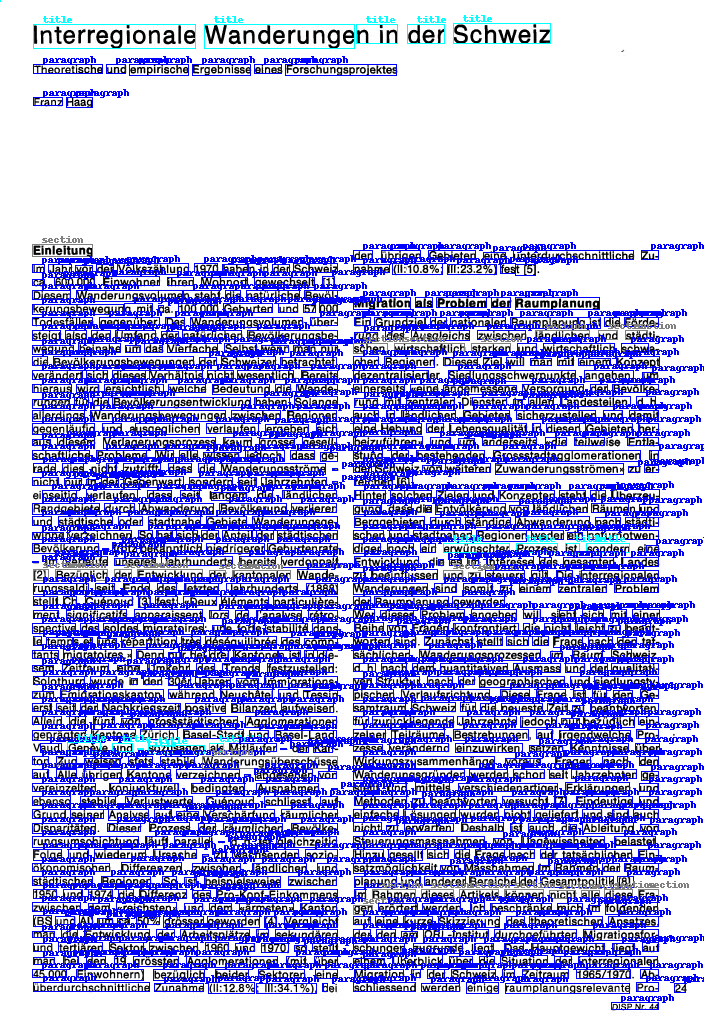

In [ ]:
img_draw

We need pytorch v 1.10 in order to use detectron2

In [ ]:
#!pip uninstall torch torchvision torchaudio torchtext
#!pip install pytorch==1.10.1 torchvision==0.11.2 torchaudio==0.10.1 cudatoolkit==11.3

In [ ]:
#import torch
#TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
#CUDA_VERSION = torch.__version__.split("+")[-1]
#print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

torch:  1.12 ; cuda:  cu113


###Imports

In [ ]:
!pip install -q transformers datasets seqeval sentencepiece

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 33.8 MB/s 


In [ ]:
!pip install -q torch==1.10.0+cu111 torchvision==0.11+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [ ]:
!pip install -q pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pytorch 1.9 (issue: https://github.com/facebookresearch/detectron2/issues/3158)
!pip install -q torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install detectron2 that matches pytorch 1.8
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
#!pip install -q detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     |████████████████████████████████| 274 kB 34.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
     |████████████████████████████████| 763.5 MB 14 kB/s 
     |████████████████████████████████| 17.3 MB 41.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.8.0+cu101 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.8.0+cu101 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-6pn4uf5_
  

In [ ]:
#!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch1.10/index.html
#!pip install sentencepiece datasets
#!pip install git+https://github.com/huggingface/transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 467 kB/s 
     |████████████████████████████████| 130 kB 7.4 MB/s 
     |████████████████████████████████| 79 kB 9.8 MB/s 
     |████████████████████████████████| 151 kB 43.7 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 843 kB 86.7 MB/s 
     |████████████████████████████████| 117 kB 90.6 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221122-py3-none-any.whl size=61484 sha256=0152ab01aeb27cf752ec21b162b3e8be2ae2b66e340df7b49e94f366b07d3f5c
  Stored in directory: /root/.cache/pip/wheels/2d/e4/d7/be0b4010933f5fffea6385e9b319eac9d6e56c82ee4a0164e5
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=a0ee78a4c0c76d4a9d4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.1 MB/s 
     |████████████████████████████████| 451 kB 96.8 MB/s 
     |████████████████████████████████| 115 kB 89.4 MB/s 
     |████████████████████████████████| 182 kB 92.7 MB/s 
     |████████████████████████████████| 212 kB 92.4 MB/s 
     |████████████████████████████████| 127 kB 78.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-mike5e3w
  Running command git clone -q https://github.com/huggingface/transformers /tmp/pip-req-build-mike5e3w
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from glob2 import glob

###Data Upload

In [ ]:
from transformers import LayoutLMv2Model, LayoutXLMTokenizer, LayoutXLMProcessor

In [ ]:
model = LayoutLMv2Model.from_pretrained("microsoft/layoutxlm-base")
tokenizer = LayoutXLMTokenizer.from_pretrained("microsoft/layoutxlm-base")
processor = LayoutXLMProcessor.from_pretrained("microsoft/layoutxlm-base", revision="no_ocr")

Some weights of the model checkpoint at microsoft/layoutxlm-base were not used when initializing LayoutLMv2Model: ['layoutlmv2.visual.backbone.bottom_up.res2.2.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.0.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res5.2.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.3.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.0.shortcut.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.2.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.0.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.18.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.15.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.0.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.22.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.ba

TypeError: ignored

In [ ]:
path_txt = '/content/txt/*'
header = ['token', 'x0', 'y0', 'x1', 'y1', 'R', 'G', 'B', 'font', 'label']
labels = [
          'abstract',
          'author',
          'caption',
          'date',
          'equation',
          'figure',
          'footer',
          'list',
          'paragraph',
          'reference',
          'section',
          'table',
          'title'
]
id2label = {v: k for v, k in enumerate(labels)}
label2id = {k: v for v, k in enumerate(labels)}

In [ ]:
from PIL import Image
#from transformers import LayoutLMv2Processor
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

#processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-base-uncased", revision="no_ocr")

# we need to define custom features
features = Features({
    'image': Array3D(dtype="int64", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': Sequence(ClassLabel(names=labels)),
})
#test
def preprocess_data(examples):
  images = [Image.open(path).convert("RGB") for path in examples['image_path']]
  words = examples['words']
  boxes = examples['bboxes']
  word_labels = examples['ner_tags']

  encoded_inputs = processor(images, words, boxes=boxes, word_labels=word_labels,
                             padding="max_length", truncation=True)

  return encoded_inputs

train_dataset = datasets['train'].map(preprocess_data, batched=True, remove_columns=datasets['train'].column_names,
                                      features=features)
test_dataset = datasets['test'].map(preprocess_data, batched=True, remove_columns=datasets['test'].column_names,
                                      features=features)

In [ ]:
for p in glob(path_txt):
    df = pd.read_csv(p, sep='\t', names=header)
    tokens = df.token.values.tolist()
    boxes = df[['x0', 'y0', 'x1', 'y1']].values.tolist()
    tokenized = tokenizer(tokens, boxes=boxes)
    break

In [ ]:
!pip install datasets

     |████████████████████████████████| 312 kB 4.1 MB/s 
     |████████████████████████████████| 212 kB 50.9 MB/s 
     |████████████████████████████████| 1.1 MB 54.8 MB/s 
     |████████████████████████████████| 67 kB 6.7 MB/s 
     |████████████████████████████████| 134 kB 52.2 MB/s 
     |████████████████████████████████| 127 kB 77.7 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 51.3 MB/s 
     |████████████████████████████████| 271 kB 47.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from datasets import load_dataset

dataset = load_dataset("MrPotato/docbank_small", use_auth_token=True)

Downloading:   0%|          | 0.00/4.67k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset doc_bank downloaded and prepared to /root/.cache/huggingface/datasets/MrPotato___doc_bank/docbank/1.0.0/e7d5930b3807c69b0dd3d77aced2bb2b67441b93c6ba12610bc7b565c05ee91d. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'bboxes', 'token_labels', 'image_path'],
        num_rows: 4500
    })
    test: Dataset({
        features: ['id', 'words', 'bboxes', 'token_labels', 'image_path'],
        num_rows: 500
    })
})

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
len(dataset['train'][10]['token_labels'])

1359

In [ ]:
vocab = tokenizer.get_vocab()
inv_vocab = {v: k for k, v in vocab.items()}

In [ ]:
vocab['▁Heizung']

210611

In [ ]:
inv_vocab[35378]

'▁Hello'

###Define Variables

In [ ]:
path_txt_files = '/content/DocBank_500K_txt/'
path_img_files = '/content/DocBank_500K_ori_img/'

In [ ]:
header = ['token', 'x0', 'y0', 'x1', 'y1', 'R', 'G', 'B', 'font', 'label']

In [ ]:
sample_file_list = [
                    '1.tar_1501.00156.gz_1501.00156v2_0', # default starting page
                    '5.tar_1501.02627.gz_paper-arXiv_18', # default reference page
                    '8.tar_1501.04154.gz_FNT_PG_xxx_0', # institutions are labeled as authors
]

In [ ]:
file_cur = sample_file_list[2]

###Explore Data

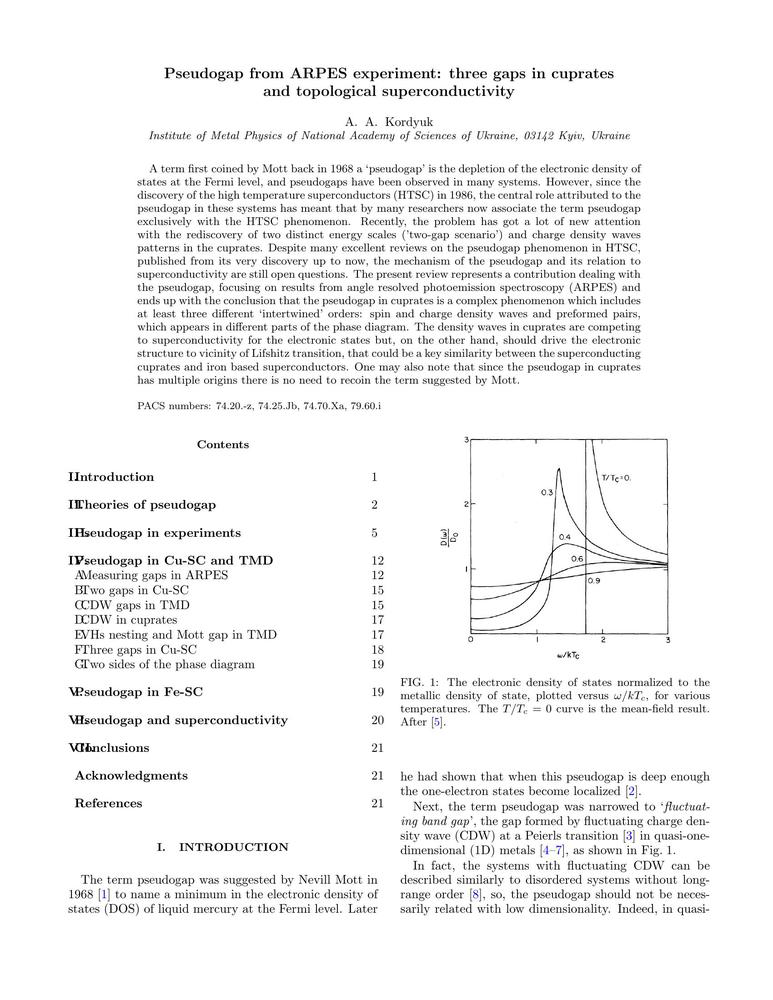

In [ ]:
with PIL.Image.open(path_img_files + file_cur + '_ori.jpg') as im:
    display(im)

In [ ]:
df_txt = pd.read_csv(path_txt_files + file_cur + '.txt', sep='\t', lineterminator='\r', names=header)
df_txt.dropna(how='any', thresh=10, inplace=True)

In [ ]:
df_txt

token     x0     y0     x1  ...    G    B           font      label
0            Pseudogap  212.0   66.0  315.0  ...  0.0  0.0  EAPNWJ+CMBX12      title
1               \nfrom  322.0   66.0  367.0  ...  0.0  0.0  EAPNWJ+CMBX12      title
2              \nARPES  374.0   66.0  449.0  ...  0.0  0.0  EAPNWJ+CMBX12      title
3        \nexperiment:  456.0   66.0  570.0  ...  0.0  0.0  EAPNWJ+CMBX12      title
4              \nthree  580.0   66.0  630.0  ...  0.0  0.0  EAPNWJ+CMBX12      title
..                 ...    ...    ...    ...  ...  ...  ...            ...        ...
515  \ndimensionality.  684.0  902.0  790.0  ...  0.0  0.0   KWKGIK+CMR10  paragraph
516          \nIndeed,  799.0  902.0  851.0  ...  0.0  0.0   KWKGIK+CMR10  paragraph
517               \nin  856.0  902.0  870.0  ...  0.0  0.0   KWKGIK+CMR10  paragraph
518           \nquasi-  876.0  902.0  918.0  ...  0.0  0.0   KWKGIK+CMR10  paragraph
519     \n##LTFigure##  568.0  435.0  867.0  ...  0.0  0.0        default     figure

[520 rows x 10 columns]

In [ ]:
alpha = 0.3
alpha_val = int(256 * alpha)
label2col = {
          'abstract': (89, 217, 9, alpha_val),
          'author': (28, 22, 224, alpha_val),
          'caption': (224, 222, 22, alpha_val),
          'date': (224, 22, 213, alpha_val),
          'equation': (173, 87, 5, alpha_val),
          'figure': (113, 44, 197, alpha_val),
          'footer': (64, 48, 33, alpha_val),
          'list': (164, 217, 206, alpha_val),
          'paragraph': (30, 30, 29, alpha_val),
          'reference': (64, 48, 33, alpha_val),
          'section': (240, 126, 158, alpha_val),
          'table': (164, 178, 55, alpha_val),
          'title': (255, 0, 0, alpha_val)
}

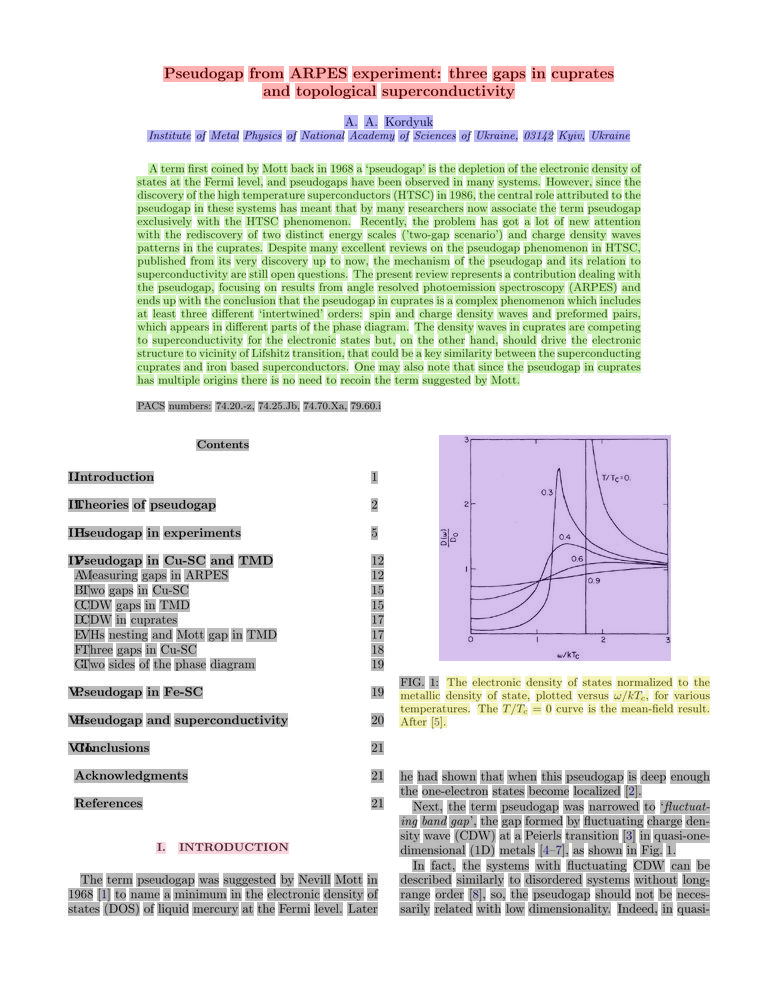

In [ ]:
with PIL.Image.open(path_img_files + file_cur + '_ori.jpg') as im:
    #im = im.convert("RGBA")
    h, w = im.size
    for i, r in df_txt.iterrows():
        shape = [(r['x0'] * h/w, r['y0']), (r['x1'] * h/w, r['y1'])]
        im_draw = ImageDraw.Draw(im, 'RGBA')
        col = label2col[r.label]
        im_draw.rectangle(shape, fill=col)
    display(im)

In [ ]:
files_txt =  glob('/content/txt/*')

In [ ]:
np.random.seed = 33

In [ ]:
random_selected = np.random.choice(files_txt, size=500, replace=False)

In [ ]:
train_txt = [p for p in files_txt if p not in random_selected]

In [ ]:
train_img = [p.replace('.txt', '_ori.jpg').replace('/content/txt/', '/content/img/') for p in train_txt]

In [ ]:
test_txt = [p for p in random_selected]

In [ ]:
test_img = [p.replace('.txt', '_ori.jpg').replace('/content/txt/', '/content/img/') for p in test_txt]

In [ ]:
import zipfile
from os.path import basename

In [ ]:
with zipfile.ZipFile("dataset.zip", "w") as zf:
    for p in train_txt:
        zf.write(p, 'train\\txt\\' + basename(p), compress_type=zipfile.ZIP_DEFLATED)
    for p in train_img:
        zf.write(p, 'train\\img\\' + basename(p), compress_type=zipfile.ZIP_DEFLATED)
    for p in test_txt:
        zf.write(p, 'test\\txt\\' + basename(p), compress_type=zipfile.ZIP_DEFLATED)
    for p in test_img:
        zf.write(p, 'test\\img\\' + basename(p), compress_type=zipfile.ZIP_DEFLATED)

In [ ]:
p

'/content/txt/102.tar_1408.2602.gz_laine_22.txt'

In [ ]:
!cp /content/dataset.zip /gdrive/MyDrive/Uni/Masterarbeit/Data/docbank/dataset.zip